# Insurance Claim Fraud Detection

# Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Dataset Link-  
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
print('Number of Rows :', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows : 1000
Number of Columns: 39


In [5]:
# Date column is act as object, so convert it into datetime datatype
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_year']=df['policy_bind_date'].dt.year

In [6]:
df.drop(['policy_bind_date'],axis= 1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_year'],
      dtype='object')

# Checking Nulls

In [9]:
# checking Data Intergrity
df.isin(['?']).sum().any()

True

In [10]:
df.replace('?',np.nan,inplace=True)

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

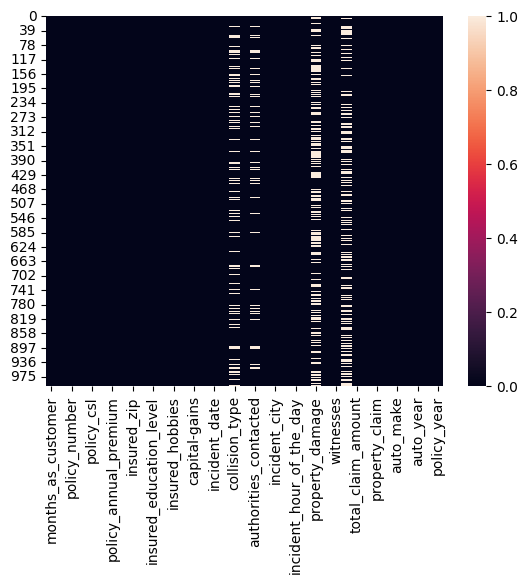

In [11]:
sns.heatmap(df.isna())
df.isna().sum()

# Removing Nulls

In [12]:
# Replacing nulls with mode of the column because it contain categorical data.
df['collision_type'].fillna(value=df['collision_type'].mode()[0],inplace=True)
df['authorities_contacted'].fillna(value=df['authorities_contacted'].mode()[0],inplace=True)
df['property_damage'].fillna(value=df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(value=df['police_report_available'].mode()[0],inplace=True)

In [13]:
df.isna().sum().any()

False

# Exploratory Data Analysis

# Univariate Analysis

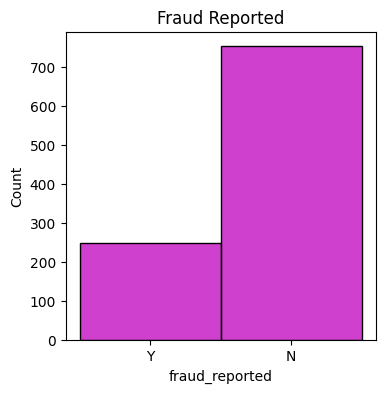

In [14]:
# plotting histogram for target variables.
plt.figure(figsize=(4,4))
sns.histplot(df['fraud_reported'],color='m')
plt.title('Fraud Reported')
plt.show()

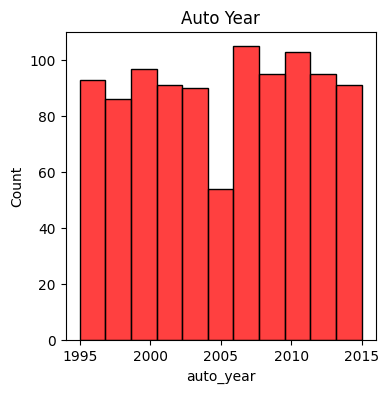

In [15]:
# plotting histogram for target variables.
plt.figure(figsize=(4,4))
sns.histplot(df['auto_year'],color='r')
plt.title('Auto Year')
plt.show()

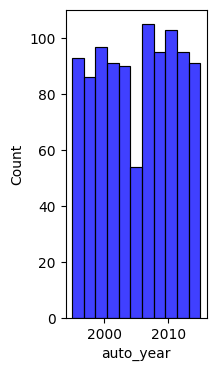

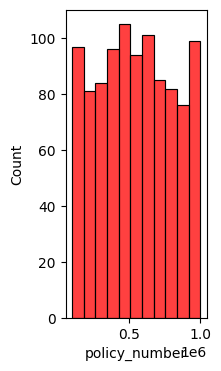

In [16]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.histplot(df['auto_year'],color='b')
plt.figure(figsize=(4,4))
plt.subplot(1,2,2)
sns.histplot(df['policy_number'],color='r')
plt.show()

In [17]:
df.drop(['auto_year','policy_number'],axis=1,inplace=True)

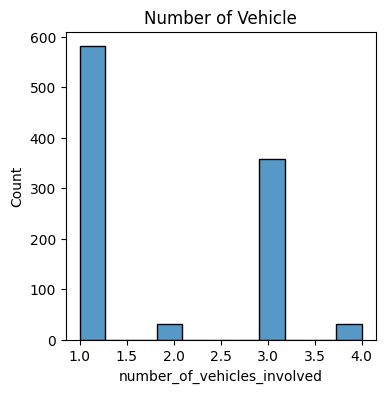

In [18]:
plt.figure(figsize=(4,4))
sns.histplot(df['number_of_vehicles_involved'])
plt.title("Number of Vehicle")
plt.show()

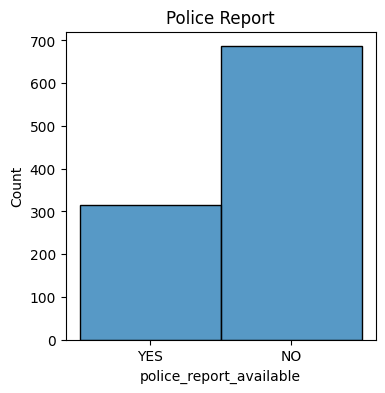

In [19]:
plt.figure(figsize=(4,4))
sns.histplot(df['police_report_available'])
plt.title("Police Report")
plt.show()

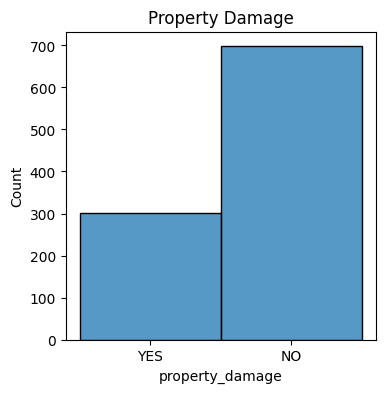

In [20]:
plt.figure(figsize=(4,4))
sns.histplot(df['property_damage'])
plt.title("Property Damage")
plt.show()

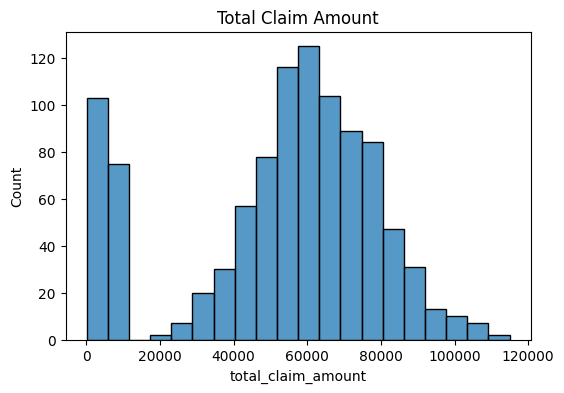

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_claim_amount'])
plt.title("Total Claim Amount")
plt.show()

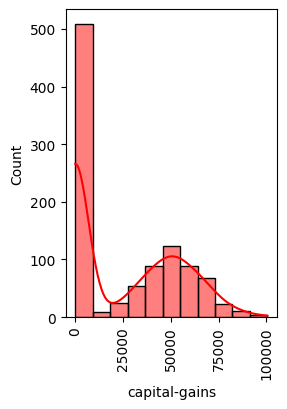

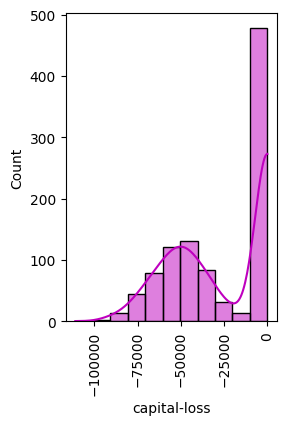

In [22]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(df['capital-gains'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)
plt.figure(figsize=(6,4))
plt.subplot(1,2,2)
sns.histplot(df['capital-loss'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)
plt.show()

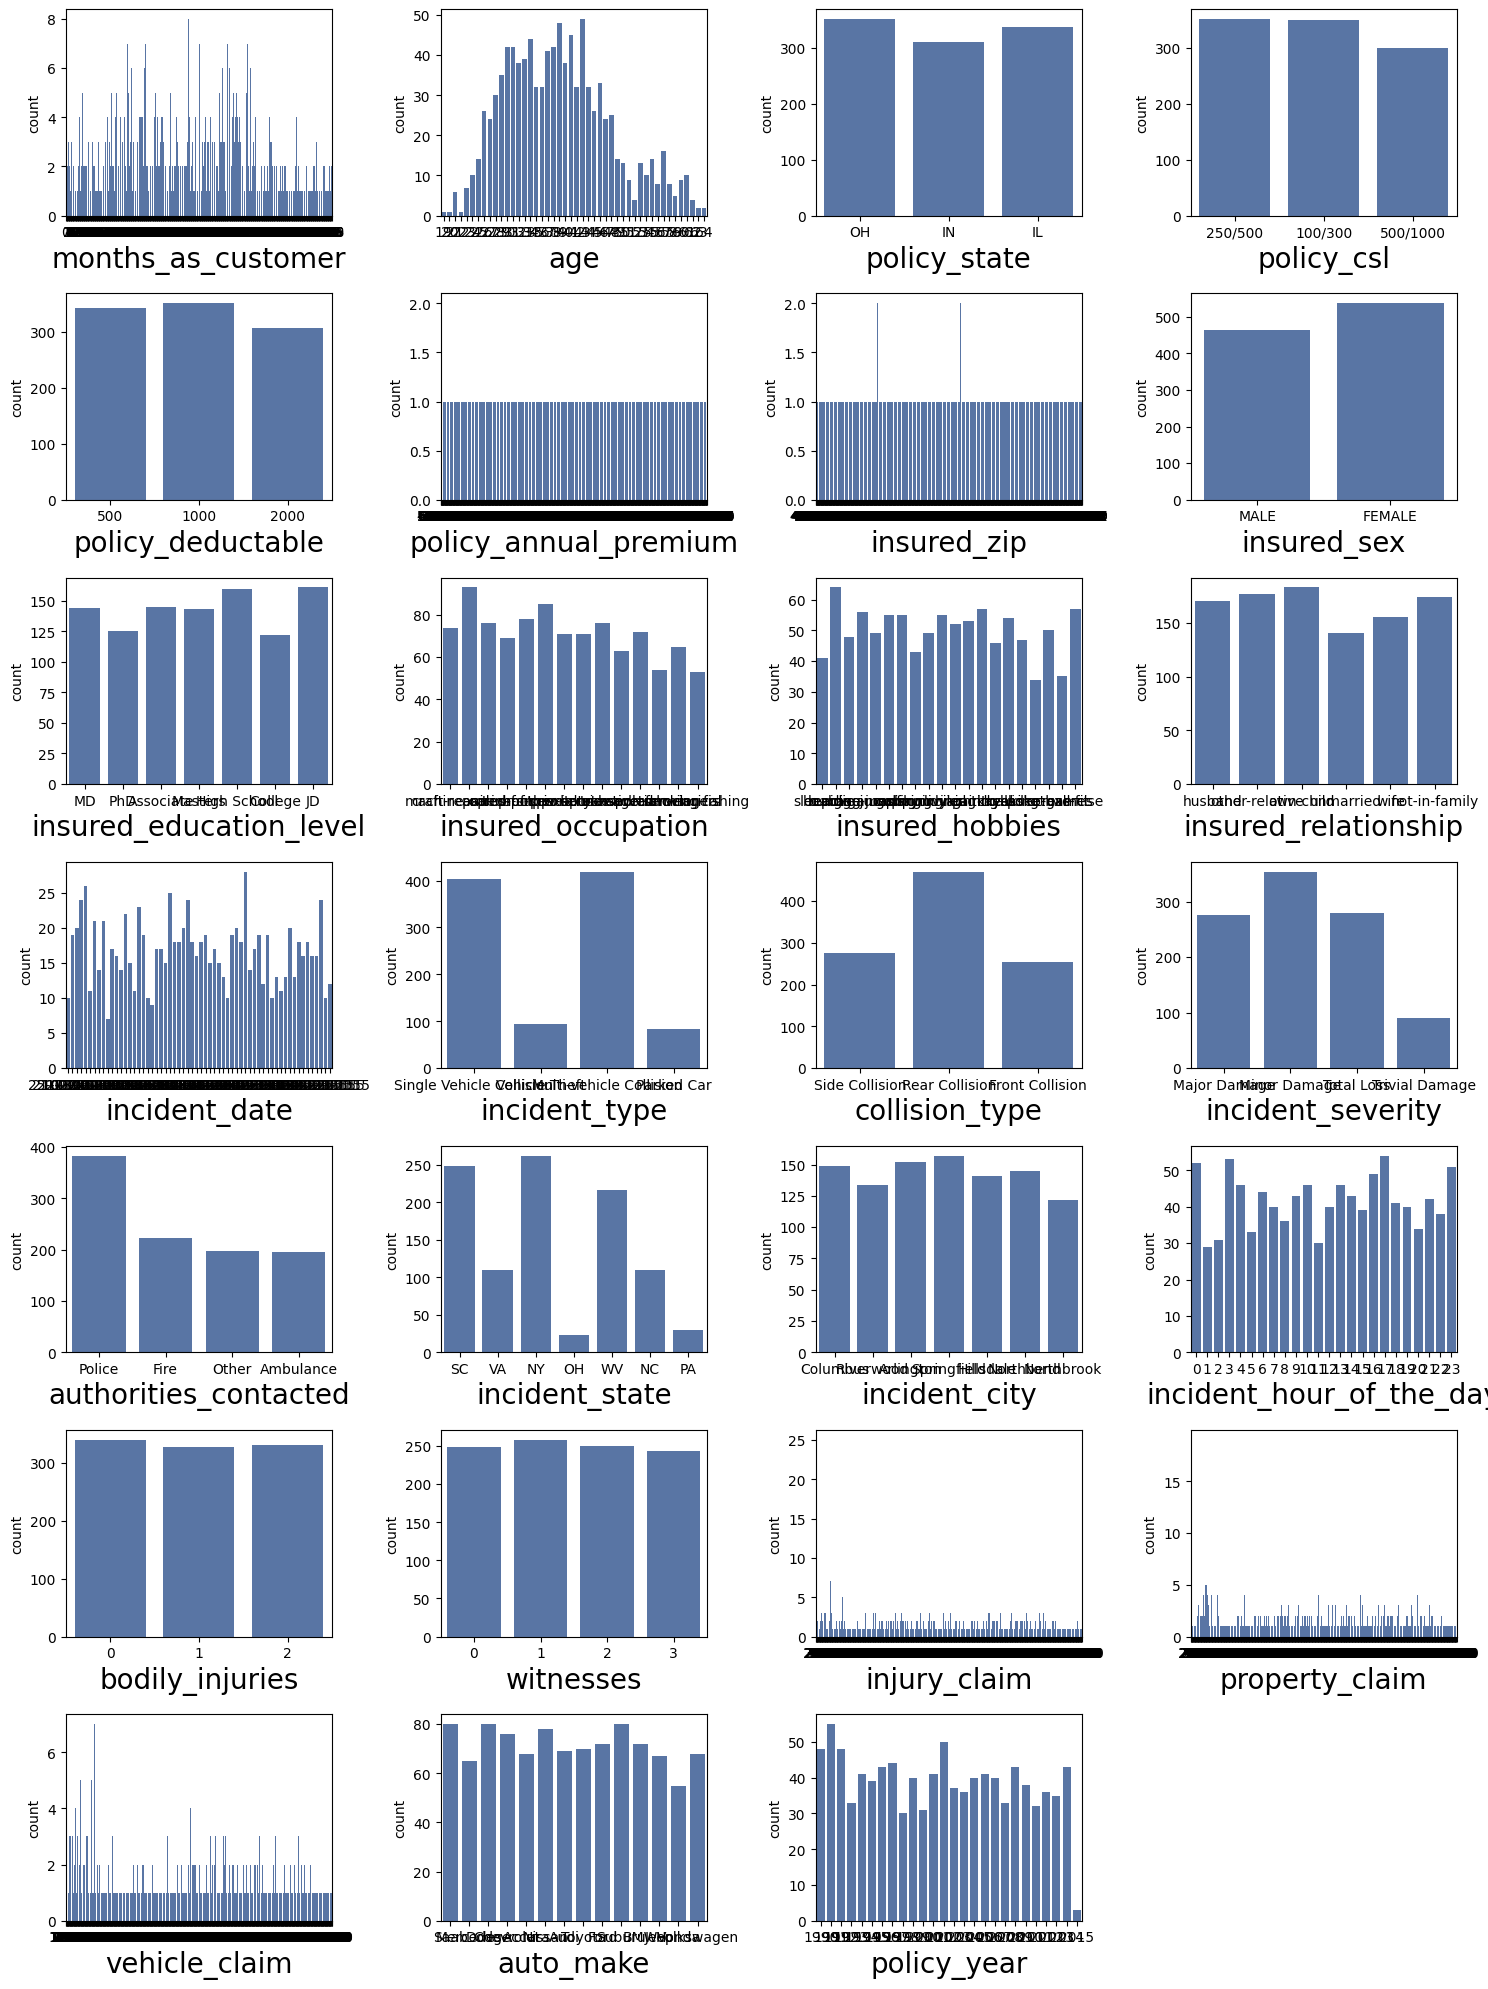

In [23]:
sns.set_palette('deep')
plt.figure(figsize=(15,20), facecolor='white')

categories=['months_as_customer', 'age', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day','bodily_injuries',
       'witnesses','injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'policy_year']
for i, category in enumerate(categories,1):
    plt.subplot(7,4,i)
    sns.countplot(data=df,x=category)
    plt.xlabel(category, fontsize=20)

plt.tight_layout()
plt.show()

# Bivariate Analysis

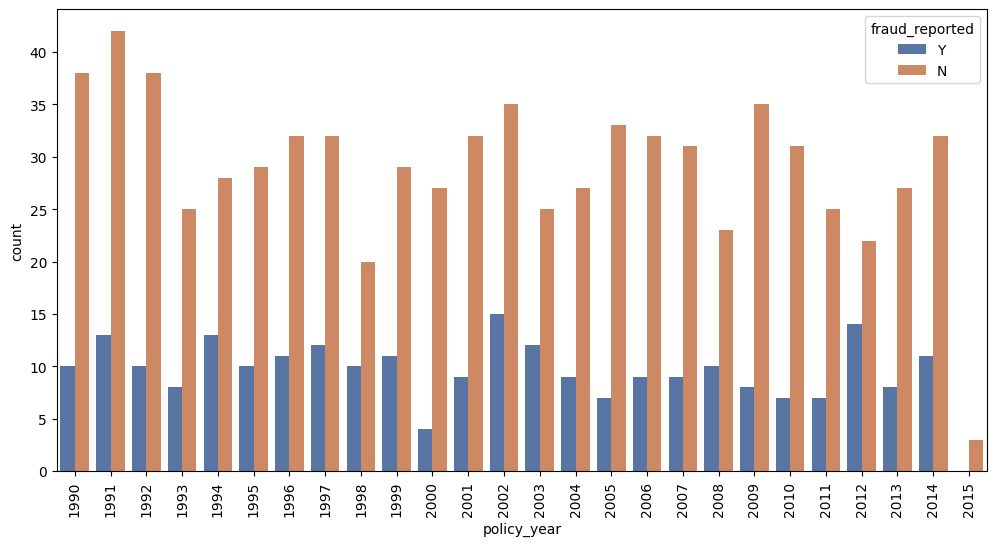

In [24]:
# Analysis with Target variable.
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='policy_year',hue='fraud_reported')
plt.xticks(fontsize=10,rotation=90)
plt.show()

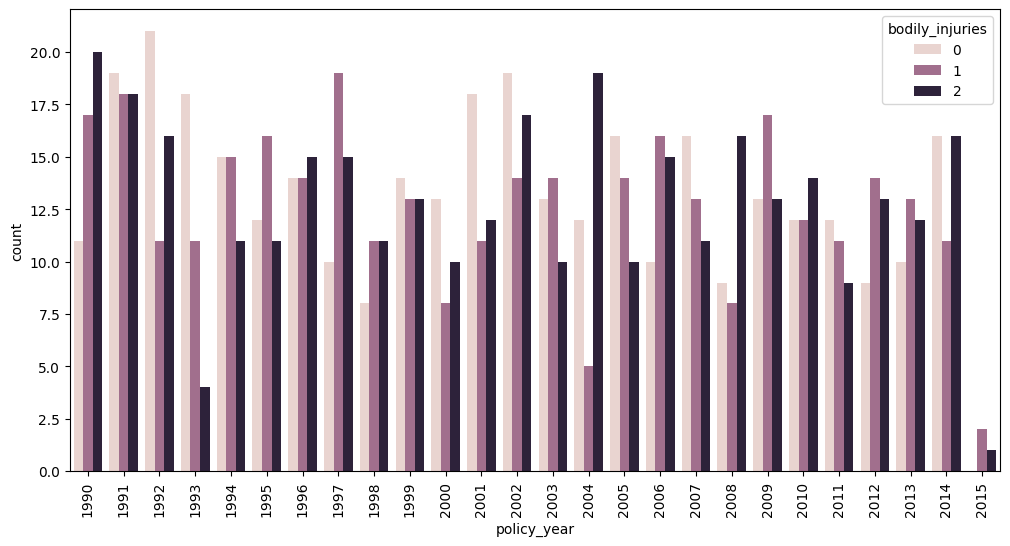

In [25]:
# Analysis with Target variable.
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='policy_year',hue='bodily_injuries')
plt.xticks(fontsize=10,rotation=90)
plt.show()

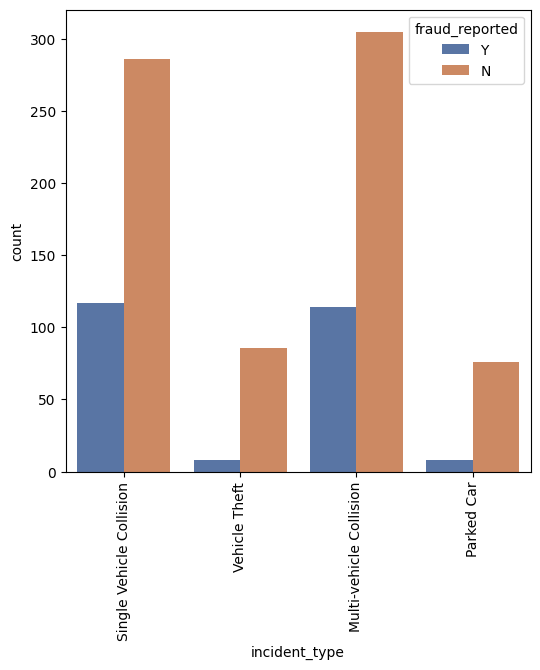

In [26]:
# Analysis with Target variable.
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='incident_type',hue='fraud_reported')
plt.xticks(fontsize=10,rotation=90)
plt.show()

Fraud Reports is very high in single and multi vehicle collision and very less in vehicle theft and parked car.

# Encoding Categorical value to numeric

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Statistical Analysis

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_state,1000.0,1.014000e+00,8.309600e-01,0.00,0.0000,1.0,2.000,2.00
policy_csl,1000.0,9.510000e-01,8.045162e-01,0.00,0.0000,1.0,2.000,2.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
insured_sex,1000.0,4.630000e-01,4.988786e-01,0.00,0.0000,0.0,1.000,1.00
insured_education_level,1000.0,2.966000e+00,1.948497e+00,0.00,1.0000,3.0,5.000,6.00


# Correlation between Dataset

<Axes: >

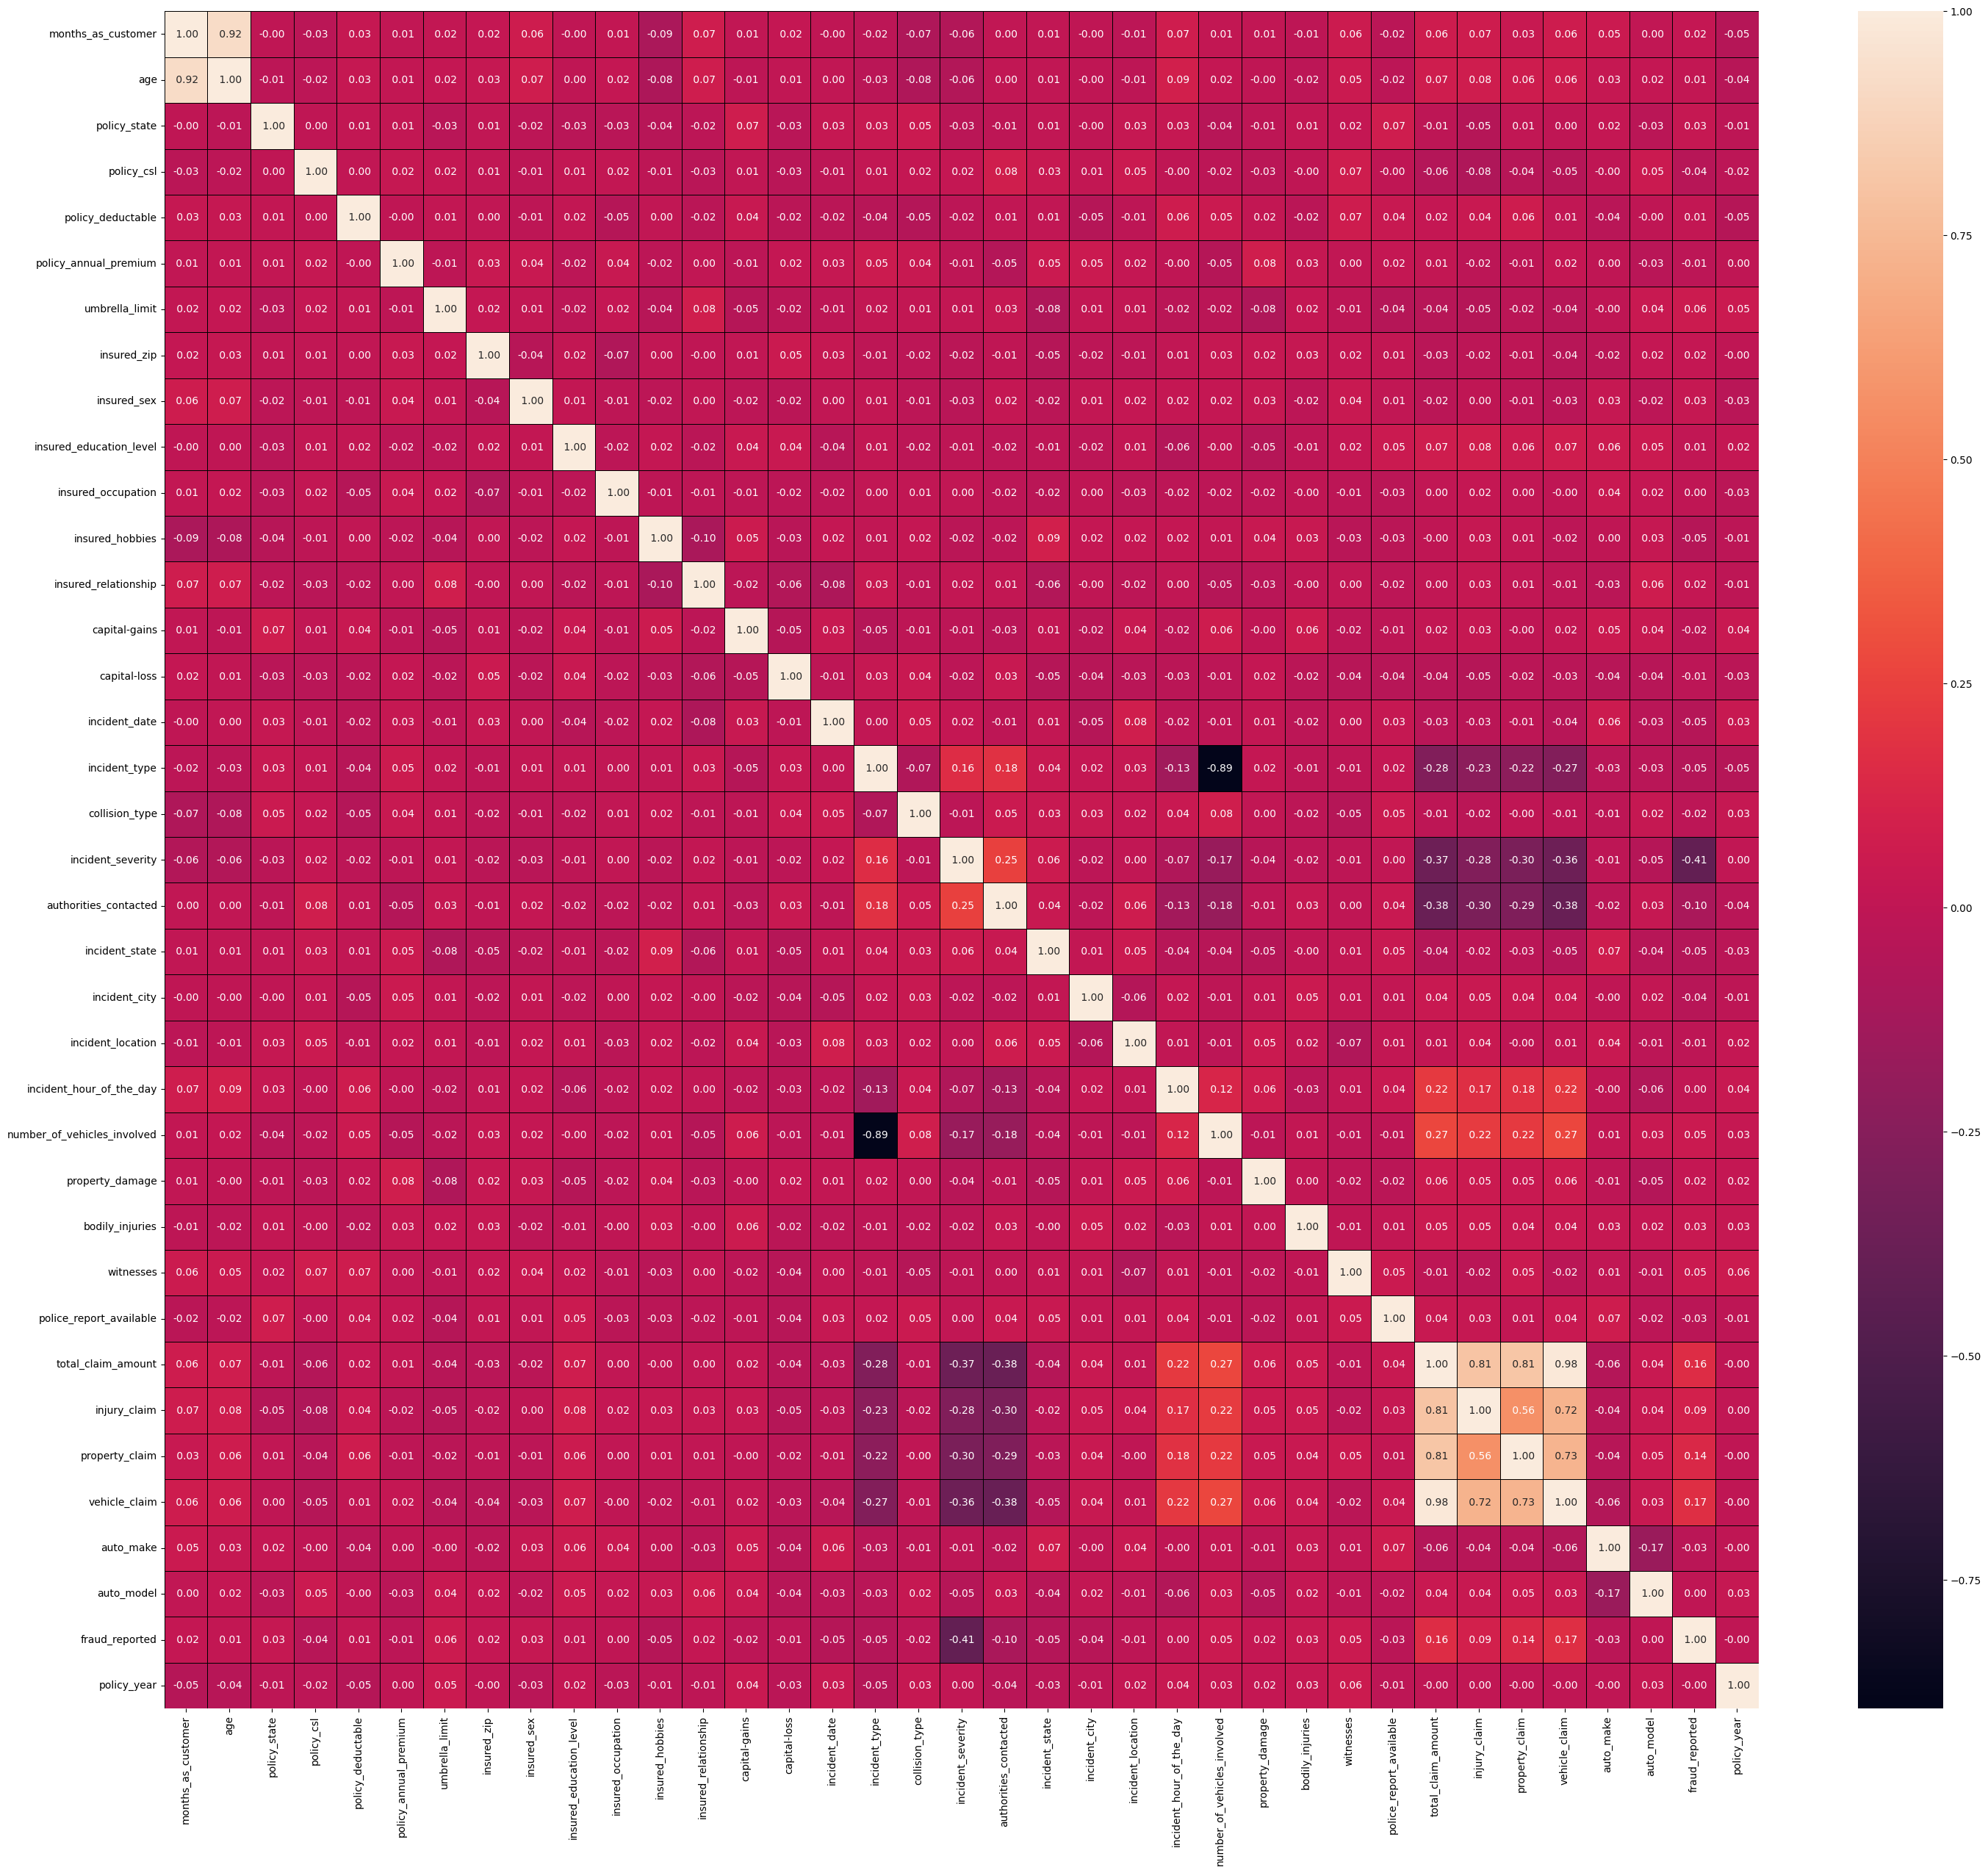

In [30]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt=' .2f')

1. Incident_severity is negatively correlated to taeget variable. so need to drop it.
2. number_of_vehicles_involved is also negatively correlated to Dataset.

In [31]:
df.drop(['incident_severity'],axis=1,inplace=True)
df.drop(['number_of_vehicles_involved'],axis=1,inplace=True)

# Outlier Detection

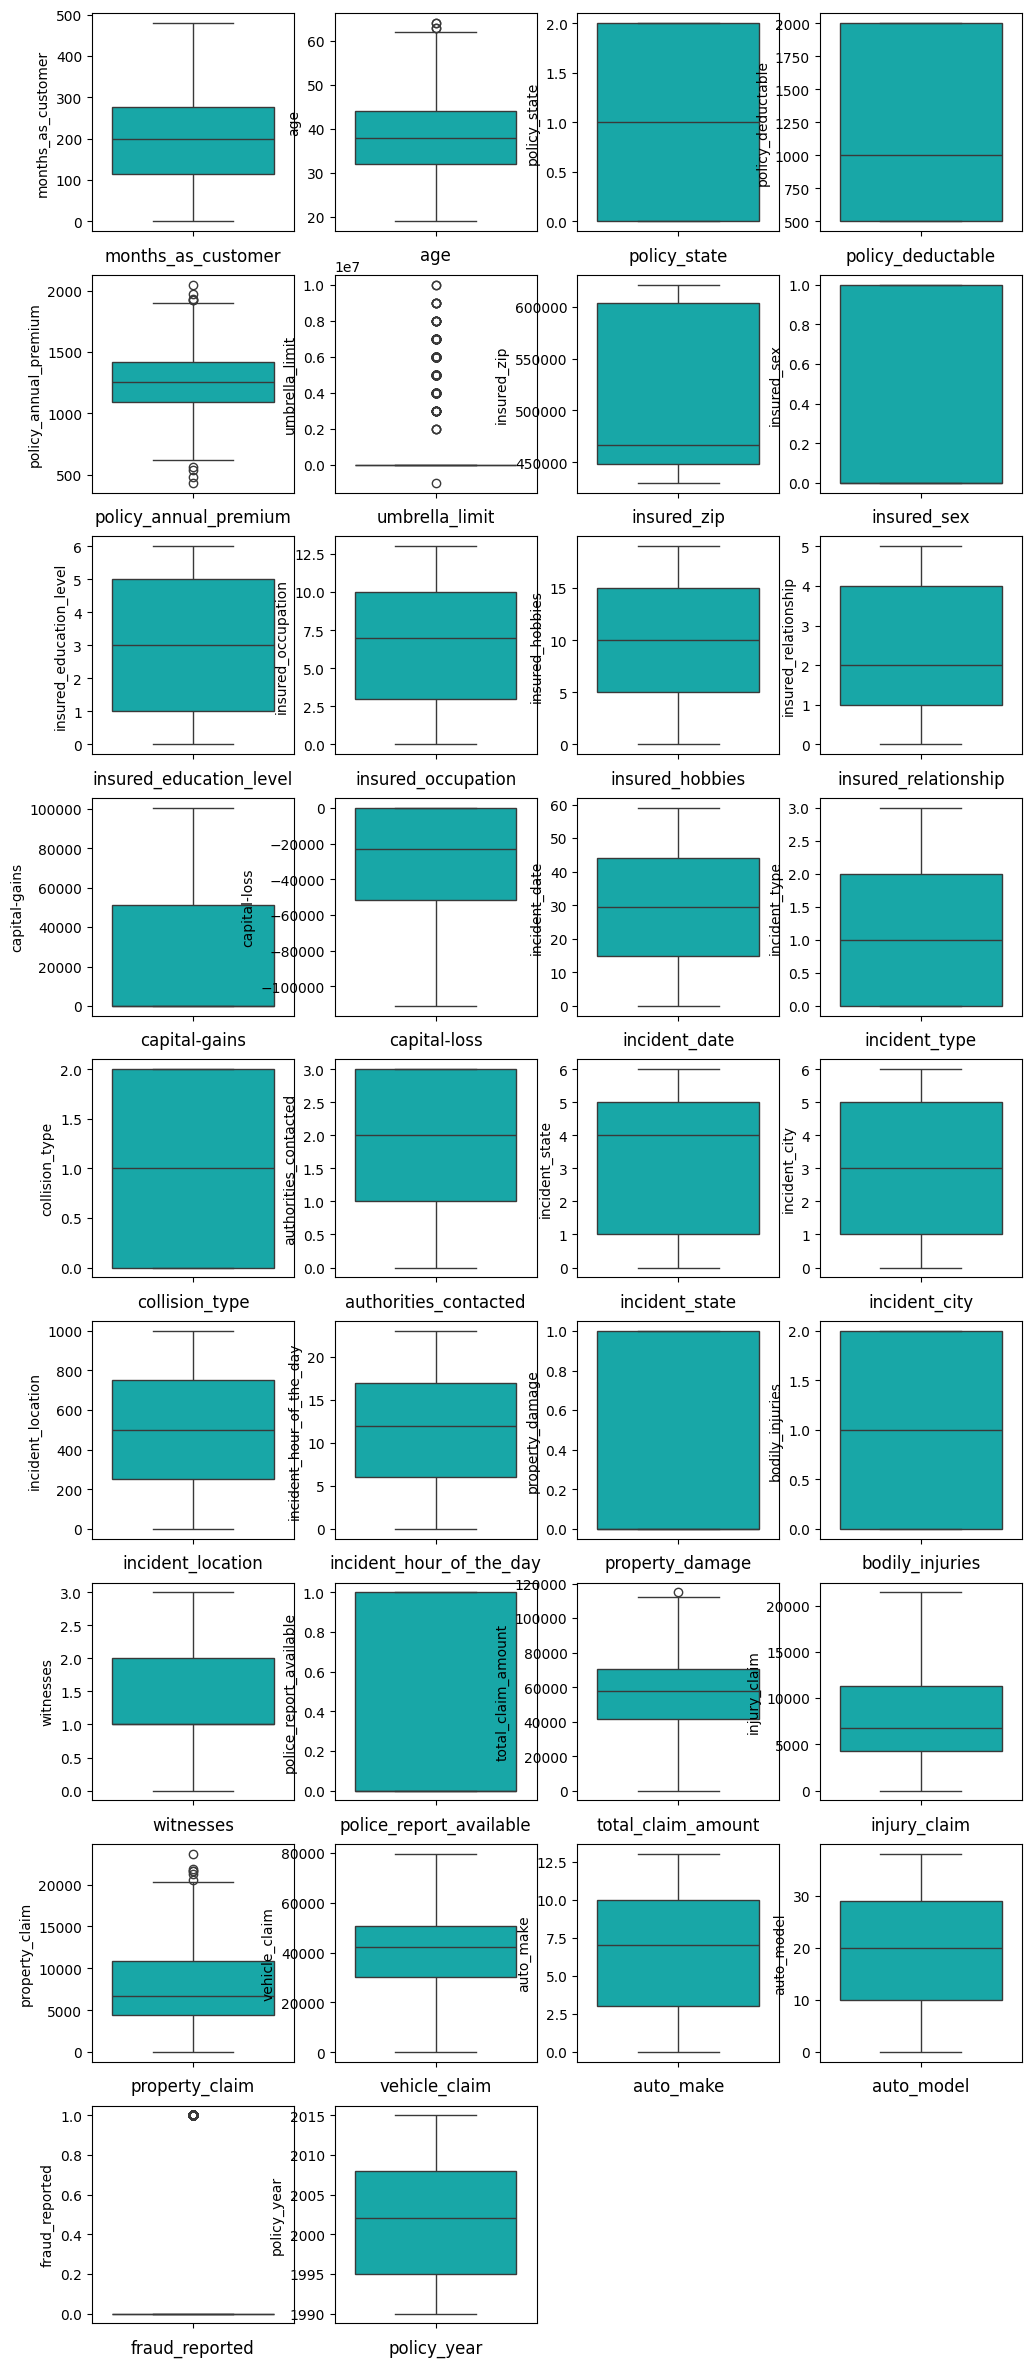

In [32]:
columns = ['months_as_customer', 'age', 'policy_state',
       'policy_deductable', 'policy_annual_premium','umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'policy_year']

plt.figure(figsize=(12,30),facecolor='white')
index=1
for column in columns:
    if index <=36:
        ax = plt.subplot(9,4,index)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

'age','property_claim','policy_anual_premimum','umbrella_limit' have outliers.

# Removing Outliers

In [33]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = ['age','property_claim','policy_annual_premium','umbrella_limit']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# set a threshold for z-score (3)
threshold = 3

# remove rows with z-score beyond the  threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

# Checking Skewness of Dataset

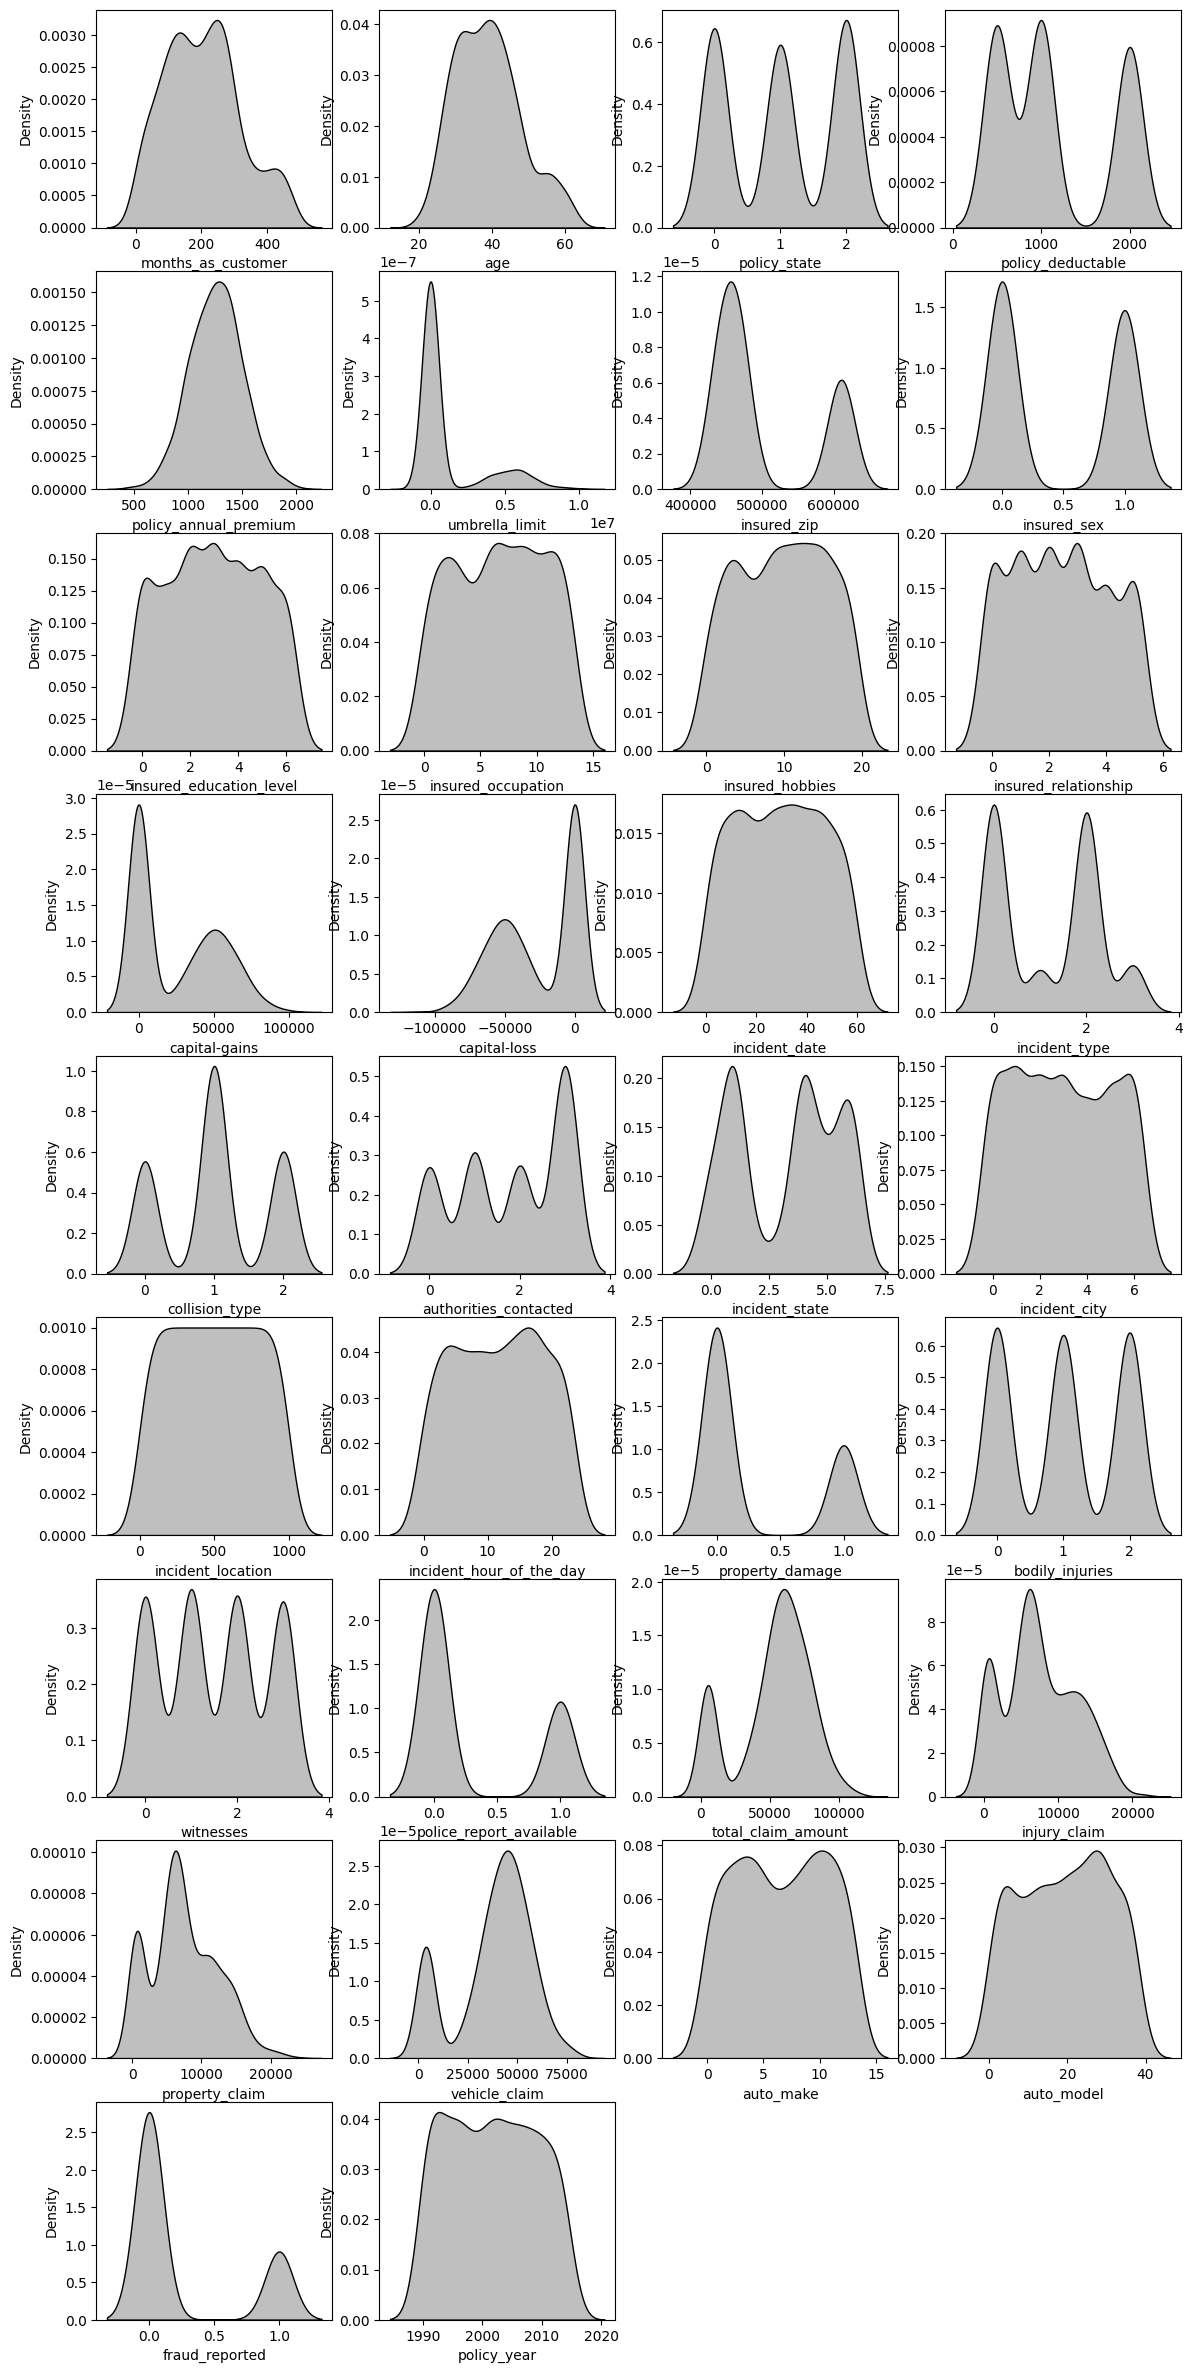

In [34]:
plt.figure(figsize=(14,30),facecolor='white')
plotnumber=1
for column in columns:
    if plotnumber <=36:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(df[column], color = 'k',hist=False,kde_kws={'shade':True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [35]:
df.skew()

months_as_customer          0.362177
age                         0.478988
policy_state               -0.026177
policy_csl                  0.088928
policy_deductable           0.477887
policy_annual_premium       0.004402
umbrella_limit              1.806712
insured_zip                 0.816554
insured_sex                 0.148630
insured_education_level    -0.000148
insured_occupation         -0.058881
insured_hobbies            -0.061563
insured_relationship        0.077488
capital-gains               0.478850
capital-loss               -0.391472
incident_date               0.004756
incident_type               0.101507
collision_type             -0.033682
authorities_contacted      -0.301862
incident_state             -0.148865
incident_city               0.049531
incident_location           0.000000
incident_hour_of_the_day   -0.035584
property_damage             0.863806
bodily_injuries             0.014777
witnesses                   0.019636
police_report_available     0.802728
t

'umbrell_limit','insured_zip','property_damage','police_report_available' have right skewness

# Removing Skewness

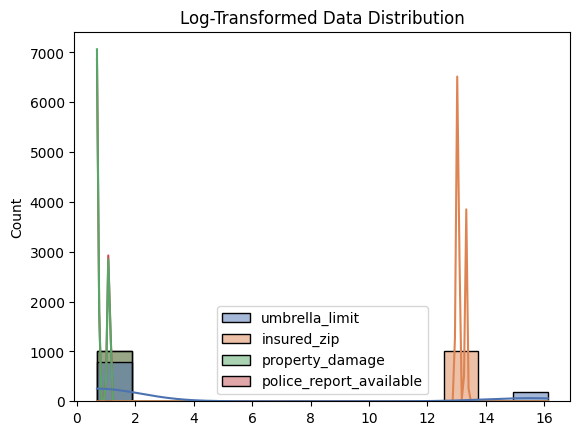

In [36]:
# columns with right-skewed data containing zeros
right_skewed = ['umbrella_limit','insured_zip','property_damage','police_report_available']

df[right_skewed] = np.log1p(df[right_skewed]+1)

# plot the  transformed data to check for skewness
sns.histplot(df[right_skewed], kde=True)
plt.title('Log-Transformed Data Distribution')
plt.show()

In [37]:
df.skew()

months_as_customer          0.362177
age                         0.478988
policy_state               -0.026177
policy_csl                  0.088928
policy_deductable           0.477887
policy_annual_premium       0.004402
umbrella_limit              1.494652
insured_zip                 0.782405
insured_sex                 0.148630
insured_education_level    -0.000148
insured_occupation         -0.058881
insured_hobbies            -0.061563
insured_relationship        0.077488
capital-gains               0.478850
capital-loss               -0.391472
incident_date               0.004756
incident_type               0.101507
collision_type             -0.033682
authorities_contacted      -0.301862
incident_state             -0.148865
incident_city               0.049531
incident_location           0.000000
incident_hour_of_the_day   -0.035584
property_damage             0.863806
bodily_injuries             0.014777
witnesses                   0.019636
police_report_available     0.802728
t

# Splitting Dataset

In [38]:
X = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

# Standard Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled=scaler.fit_transform(X)
X['umbrella_limit'] = X['umbrella_limit'].fillna(0)

In [40]:
X.isnull().sum()

months_as_customer          0
age                         0
policy_state                0
policy_csl                  0
policy_deductable           0
policy_annual_premium       0
umbrella_limit              0
insured_zip                 0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
capital-gains               0
capital-loss                0
incident_date               0
incident_type               0
collision_type              0
authorities_contacted       0
incident_state              0
incident_city               0
incident_location           0
incident_hour_of_the_day    0
property_damage             0
bodily_injuries             0
witnesses                   0
police_report_available     0
total_claim_amount          0
injury_claim                0
property_claim              0
vehicle_claim               0
auto_make                   0
auto_model                  0
policy_yea

# Machine Learning Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import r2_score

In [42]:
# spliting data for training and testing.
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)

X_train.shape

(800, 34)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Best Accuracy is:',maxAccu*100,'On Randam_state',maxRS)

Best Accuracy is: 83.5 On Randam_state 190


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=190)
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistic Regression :'+'\033[0m', accuracy_score(y_test,pred1))
print('\n')
print('\033[1m'+'Confusion Matrix of Logistic Regression :'+'\033[0m \n', confusion_matrix(y_test,pred1))
print('\n')
print('\033[1m'+'Classification Report of Logistic Regression :'+'\033[0m \n', classification_report(y_test,pred1))

Logistics Regression Evaluation


Accuracy Score of Logistic Regression : 0.835


Confusion Matrix of Logistic Regression : 
 [[165   1]
 [ 32   2]]


Classification Report of Logistic Regression : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       166
           1       0.67      0.06      0.11        34

    accuracy                           0.83       200
   macro avg       0.75      0.53      0.51       200
weighted avg       0.81      0.83      0.77       200



# Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
maxAccu1 = 0
maxRS1 = 0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    dtc = LogisticRegression()
    dtc.fit(X_train,y_train)
    y_pred1 = dtc.predict(X_test)
    acc1=accuracy_score(y_test,y_pred1)
    if acc1>maxAccu1:
        maxAccu1 = acc1
        maxRS1=i
print('Best Accuracy is:',(maxAccu1)*100,'\nAt Randam_state: ',maxRS1)

Best Accuracy is: 83.5 
At Randam_state:  190


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__+':'+'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m \n', accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix :'+'\033[0m \n', confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n', classification_report(y_test,y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score : 
 0.79


Confusion Matrix : 
 [[158   0]
 [ 42   0]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       158
           1       0.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.62      0.79      0.70       200



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score : 
 0.665


Confusion Matrix : 
 [[118  40]
 [ 27  15]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       158
           1       0.27      0.36      0.31        42

    accuracy                           0.67       200
   macro avg       0.54      0.55      0.54       200
weighted avg       0.70      0.67      0.68       200



Classification ML Algori

# Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param = {'penalty':['l1','l2'],
         'C':[0.001,0.01,0.1,1,10],
         'solver':['liblinear','lbfgs','saga'],
         'max_iter':[100,200,300],
         'class_weight':[None,'balanced']}

grid_search = GridSearchCV(LogisticRegression(),param, cv=5, scoring='accuracy', verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.00

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy', verbose=5)

In [50]:
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'C': 0.001, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}


# Final Model

In [51]:
model = LogisticRegression(C = 0.01, class_weight = None, max_iter = 100, penalty = 'l1', solver = 'liblinear')

In [52]:
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistic Regression :'+'\033[0m', accuracy_score(y_test,ypred))
print('\n')
print('\033[1m'+'Confusion Matrix of Logistic Regression :'+'\033[0m \n', confusion_matrix(y_test,ypred))
print('\n')
print('\033[1m'+'Classification Report of Logistic Regression :'+'\033[0m \n', classification_report(y_test,ypred))

Logistics Regression Evaluation


Accuracy Score of Logistic Regression : 0.79


Confusion Matrix of Logistic Regression : 
 [[158   0]
 [ 42   0]]


Classification Report of Logistic Regression : 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       158
           1       0.00      0.00      0.00        42

    accuracy                           0.79       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.62      0.79      0.70       200



# Prediction Based on Model

In [53]:
prediction = pd.DataFrame({'Predicted Values':ypred, 'Actual Values':y_test})
prediction

,Predicted Values,Actual Values
121,0,1
122,0,1
892,0,0
147,0,0
572,0,0
...,...,...
80,0,0
947,0,0
255,0,0
641,0,0


# Saving Model

In [54]:
import joblib
joblib.dump(model,'Insurance_Claim_Fraud_Detection.pkl')

['Insurance_Claim_Fraud_Detection.pkl']